In [1]:
#importing the needed libraries
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
import numpy as np
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, make_scorer, recall_score, f1_score, confusion_matrix, accuracy_score

In [15]:
import sklearn
import numpy
import pandas

# printing the version of the libraries
print("scikit-learn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)

scikit-learn: 1.2.2
numpy: 1.24.3
pandas: 1.5.3


In [2]:
#reading in the data we will use in the machine learning pipeline, with the top ten features of the method
df = pd.read_excel('acc_3sec_training.xlsx')
df

,AccZ_Spectral_Variance,AccZ_RMS,AccZ_Spectral_Skewness,AccZ_Spectral_Mean,AccZ_Spectral_Kurtosis,AccZ_Spectral_Flatness,AccZ_Spectral_Entropy,AccZ_Spectral_Crest,AccZ_ZCR,AccZ_Spectral_Rolloff_50,Task_Label,Participant,Classification
0,0.000975,0.001000,0.608172,0.051831,0.186154,0.373549,10.271485,0.002181,0.436442,269.612630,12,10785,0
1,0.000962,0.000984,0.617816,0.051373,0.142754,0.376258,10.275153,0.002144,0.442871,273.274740,12,10785,0
2,0.000928,0.000978,0.572088,0.051265,0.095905,0.372344,10.281541,0.002301,0.439860,271.809896,12,10785,0
3,0.000972,0.000978,0.670883,0.050627,0.336250,0.372811,10.263837,0.002445,0.436930,272.054036,12,10785,0
4,0.000915,0.000973,0.614186,0.051028,0.275045,0.398881,10.287121,0.002598,0.452067,275.227865,12,10785,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27055,0.000953,0.000981,0.600301,0.050985,0.185065,0.378698,10.271195,0.002273,0.430908,265.462240,93,94527,0
27056,0.001052,0.001017,0.576588,0.052926,0.305357,0.355448,10.256925,0.002425,0.437988,267.822266,93,94527,0
27057,0.000970,0.000997,0.525986,0.051959,-0.121135,0.351706,10.274308,0.002051,0.444987,271.728516,93,94527,0
27058,0.002666,0.001175,3.187837,0.062799,17.412909,0.348041,10.172010,0.005005,0.427653,260.253906,93,94527,0


In [3]:
# extracting the features from the DataFrame
features = df.drop(columns=['Classification', 'Participant', 'Task_Label'])

# extracting the Classification (0/1) and participants from the dataframe
target = df['Classification'].values
participants = df['Participant'].values
task = df['Task_Label'].values

# extracting the feature names
feature_names = features.columns.tolist()

# converting the features, target, participants to numpy arrays
features_array = features.values
target_array = target

# creating the dictionary with the needed format to enter into the nested cross-validation
data_dict = {
    'data': features_array,
    'target': target_array,
    'feature_names': feature_names,
    'participants': participants,
    'task': task
}

data_dict

{'data': array([[9.75335959e-04, 9.99762909e-04, 6.08172067e-01, ...,
         2.18124725e-03, 4.36442057e-01, 2.69612630e+02],
        [9.61636701e-04, 9.84197832e-04, 6.17815951e-01, ...,
         2.14420629e-03, 4.42871094e-01, 2.73274740e+02],
        [9.27569902e-04, 9.77547141e-04, 5.72087619e-01, ...,
         2.30083942e-03, 4.39860026e-01, 2.71809896e+02],
        ...,
        [9.70174569e-04, 9.97141353e-04, 5.25985770e-01, ...,
         2.05056535e-03, 4.44986979e-01, 2.71728516e+02],
        [2.66607141e-03, 1.17454329e-03, 3.18783692e+00, ...,
         5.00510495e-03, 4.27652995e-01, 2.60253906e+02],
        [4.62043364e-03, 1.60542119e-03, 2.40599446e+00, ...,
         4.40923246e-03, 4.12272135e-01, 2.32666016e+02]]),
 'target': array([0, 0, 0, ..., 0, 0, 0]),
 'feature_names': ['AccZ_Spectral_Variance',
  'AccZ_RMS',
  'AccZ_Spectral_Skewness',
  'AccZ_Spectral_Mean',
  'AccZ_Spectral_Kurtosis',
  'AccZ_Spectral_Flatness',
  'AccZ_Spectral_Entropy',
  'AccZ_Spectral_Cre

In [4]:
#After acknowleding Gradient Boosting performed the best in the nested CVs for the Acc-Gyro method,
#we continue below with training a final best model for this method

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

#X and Y are also defined previously but let's recall
X = data_dict['data']
Y = data_dict['target']

# specifying our hyperparameters (modes taken from the outer loops of the best performing nested CV)
hyperparameters = {
    'learning_rate': 0.1,  
    'max_depth': 4, 
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200,
    'subsample': 1.0  
}

# calling the classifier
gbc_model_acc = GradientBoostingClassifier(**hyperparameters)

# training a model
gbc_model_acc.fit(X, Y)

GradientBoostingClassifier(max_depth=4, max_features='sqrt', n_estimators=200)

In [5]:
#let's already save the trained model for later deployment (so future users don't need to retrain the model)

import pickle

with open('acc_model_3sec_resaved.pkl', 'wb') as file:
    pickle.dump(gbc_model_acc, file)

print("Model saved.")


Model saved.


In [6]:
df_new = pd.read_excel('acc_3sec_testing.xlsx')
# it is essential to rearrange columns in the needed order
ordered_columns = [
    'AccZ_Spectral_Variance', 'AccZ_RMS', 'AccZ_Spectral_Skewness', 'AccZ_Spectral_Mean',
    'AccZ_Spectral_Kurtosis', 'AccZ_Spectral_Flatness', 'AccZ_Spectral_Entropy', 'AccZ_Spectral_Crest',
    'AccZ_ZCR', 'AccZ_Spectral_Rolloff_50', 'Task_Label', 'Participant', 'Classification'
]

# Reorder the columns in the DataFrame
df_new = df_new[ordered_columns]

df_new

,AccZ_Spectral_Variance,AccZ_RMS,AccZ_Spectral_Skewness,AccZ_Spectral_Mean,AccZ_Spectral_Kurtosis,AccZ_Spectral_Flatness,AccZ_Spectral_Entropy,AccZ_Spectral_Crest,AccZ_ZCR,AccZ_Spectral_Rolloff_50,Task_Label,Participant,Classification
0,0.001049,0.001009,0.720813,0.052280,0.572163,0.354241,10.261143,0.002689,0.438883,271.728516,12,11737,0
1,0.000944,0.000976,0.555628,0.050785,0.135944,0.366638,10.265204,0.002181,0.449626,274.739583,12,11737,0
2,0.001024,0.001010,0.643134,0.052276,0.242575,0.356054,10.264216,0.002522,0.447673,267.659505,12,11737,0
3,0.001001,0.000990,0.682118,0.051151,0.275851,0.367042,10.263158,0.002268,0.448893,272.135417,12,11737,0
4,0.000975,0.000989,0.485330,0.051557,-0.177679,0.381507,10.263719,0.002113,0.434896,269.124349,12,11737,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,0.001406,0.001191,0.799522,0.061834,0.957179,0.388775,10.279353,0.002503,0.431396,265.055339,93,99994,0
6596,0.001341,0.001157,0.628689,0.060208,0.305566,0.378829,10.266590,0.002228,0.436523,271.565755,93,99994,0
6597,0.001325,0.001159,0.674852,0.060079,0.416310,0.373926,10.269748,0.002290,0.440837,267.822266,93,99994,0
6598,0.001562,0.001239,0.702297,0.063932,0.428207,0.368301,10.263217,0.002405,0.434977,263.509115,93,99994,0


In [7]:
import pandas as pd
import numpy as np

#we define our dictionary that will enable us to test the final best method

#drop ALL columns that is not a feature
features_new = df_new.drop(columns=['Classification', 'Participant', 'Task_Label'])

# extracting the target (Classification) and participants
target_new = df_new['Classification'].values
participants_new = df_new['Participant'].values
task_new = df_new['Task_Label'].values

# extracting the feature names
feature_names_new = features_new.columns.tolist()

# converting the features, target, and participants to numpy arrays
features_array_new = features_new.values
target_array_new = target_new

# creating the dictionary with the needed format
data_dict_new = {
    'data': features_array_new,
    'target': target_array_new,
    'feature_names': feature_names_new,
    'participants': participants_new,
    'task': task_new
}

data_dict_new


{'data': array([[1.04853284e-03, 1.00899092e-03, 7.20813426e-01, ...,
         2.68865272e-03, 4.38883464e-01, 2.71728516e+02],
        [9.44069910e-04, 9.76040959e-04, 5.55628152e-01, ...,
         2.18140012e-03, 4.49625651e-01, 2.74739583e+02],
        [1.02419163e-03, 1.01019593e-03, 6.43133672e-01, ...,
         2.52207090e-03, 4.47672526e-01, 2.67659505e+02],
        ...,
        [1.32527482e-03, 1.15898065e-03, 6.74851851e-01, ...,
         2.28955377e-03, 4.40836589e-01, 2.67822266e+02],
        [1.56221546e-03, 1.23933412e-03, 7.02297347e-01, ...,
         2.40463382e-03, 4.34977214e-01, 2.63509115e+02],
        [1.31396009e-03, 1.16446230e-03, 6.17173381e-01, ...,
         2.42026928e-03, 4.41324870e-01, 2.61555990e+02]]),
 'target': array([0, 0, 0, ..., 0, 0, 0]),
 'feature_names': ['AccZ_Spectral_Variance',
  'AccZ_RMS',
  'AccZ_Spectral_Skewness',
  'AccZ_Spectral_Mean',
  'AccZ_Spectral_Kurtosis',
  'AccZ_Spectral_Flatness',
  'AccZ_Spectral_Entropy',
  'AccZ_Spectral_Cre

In [8]:
X_test = data_dict_new['data']
Y_test = data_dict_new['target']
groups_test = data_dict_new['participants'] # we do not group while testing, but just saving the variable

In [9]:
#getting the training and testing accuracies

train_acc = accuracy_score(y_true=Y, y_pred=gbc_model_acc.predict(X))
test_acc = accuracy_score(y_true=Y_test, y_pred=gbc_model_acc.predict(X_test))

print('Training Accuracy: %.4f%%' % (100 * train_acc))
print('Test Accuracy: %.4f%%' % (100 * test_acc))

Training Accuracy: 97.9749%
Test Accuracy: 97.5606%


In [10]:
#calculating the AUC
predicted_probs = gbc_model_acc.predict_proba(X_test)[:, 1]  # probability of the positive class
auc = roc_auc_score(Y_test, predicted_probs)
auc

0.9874409226190476

In [11]:
predicted_probs #these probabilities will be pasted into the R script to run the DeLong's test

array([0.01255994, 0.00728898, 0.01011841, ..., 0.02804239, 0.11229631,
       0.02464213])

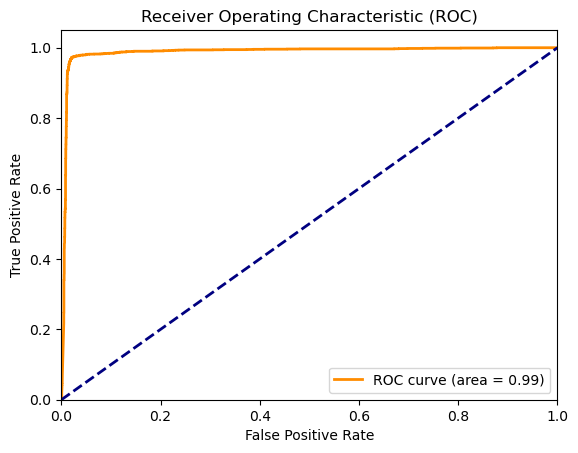

In [12]:
#calculating and plotting the ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(Y_test, predicted_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#here, we will form confusion matrices, and calculate the sensitivity and specificity for the test set

train_preds = gbc_model_acc.predict(X)
test_preds = gbc_model_acc.predict(X_test)

# making the confusion matrix for train set
conf_matrix_train = confusion_matrix(y_true=Y, y_pred=train_preds)

# making the confusion matric for test set
conf_matrix_test = confusion_matrix(y_true=Y_test, y_pred=test_preds)

# compute specificity and sensitivity via confusion matrix
specificity_train = conf_matrix_train[0, 0] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1])
sensitivity_train = conf_matrix_train[1, 1] / (conf_matrix_train[1, 0] + conf_matrix_train[1, 1])

specificity_test = conf_matrix_test[0, 0] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1])
sensitivity_test = conf_matrix_test[1, 1] / (conf_matrix_test[1, 0] + conf_matrix_test[1, 1])

# computing accuracy (was also computed previously)
train_acc = accuracy_score(y_true=Y, y_pred=train_preds)
test_acc = accuracy_score(y_true=Y_test, y_pred=test_preds)

# printing the results
print('Confusion Matrix - Training Data:\n', conf_matrix_train)
print('Specificity - Training Data: %.4f' % specificity_train)
print('Sensitivity - Training Data: %.4f' % sensitivity_train)
print('Training Accuracy: %.4f%%' % (100 * train_acc))

print('\nConfusion Matrix - Test Data:\n', conf_matrix_test)
print('Specificity - Test Data: %.4f' % specificity_test)
print('Sensitivity - Test Data: %.4f' % sensitivity_test)
print('Test Accuracy: %.4f%%' % (100 * test_acc))


Confusion Matrix - Training Data:
 [[17038   182]
 [  366  9474]]
Specificity - Training Data: 0.9894
Sensitivity - Training Data: 0.9628
Training Accuracy: 97.9749%

Confusion Matrix - Test Data:
 [[4121   79]
 [  82 2318]]
Specificity - Test Data: 0.9812
Sensitivity - Test Data: 0.9658
Test Accuracy: 97.5606%


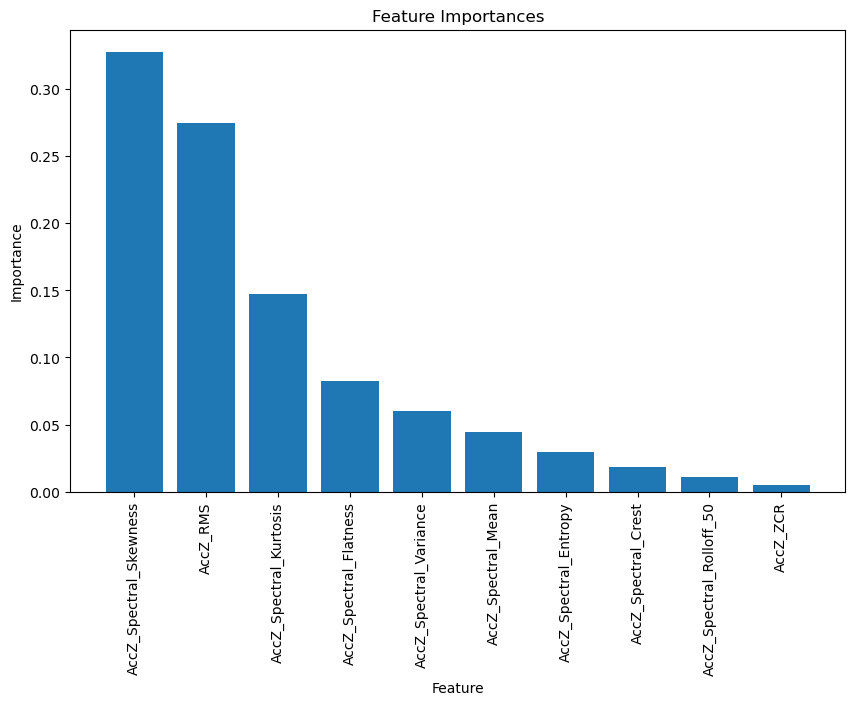

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# get the feature names from the data_dict
feature_names = data_dict['feature_names']

# get feature importances from the model
importances = gbc_model_acc.feature_importances_

# sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
